In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

dataset_path = '/content/drive/MyDrive/Colab Notebooks/opsd_germany_daily.csv'

opsd_daily = pd.read_csv(dataset_path)
opsd_daily.head(10)


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN
5,2006-01-06,1403.427,NaN,NaN,NaN
6,2006-01-07,1300.287,NaN,NaN,NaN
7,2006-01-08,1207.985,NaN,NaN,NaN
8,2006-01-09,1529.323,NaN,NaN,NaN
9,2006-01-10,1576.911,NaN,NaN,NaN


In [ ]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [ ]:
opsd_daily.index = pd.to_datetime(opsd_daily.index)

opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()

opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


In [ ]:
opsd_daily.loc['2014':'2018']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-01,1080.08000,220.085,30.493,250.578,2014,1,Wednesday
2014-01-02,1343.10100,304.166,13.680,317.846,2014,1,Thursday
2014-01-03,1379.77600,340.639,23.510,364.149,2014,1,Friday
2014-01-04,1271.02900,260.828,15.227,276.055,2014,1,Saturday
2014-01-05,1182.41600,175.812,18.067,193.879,2014,1,Sunday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


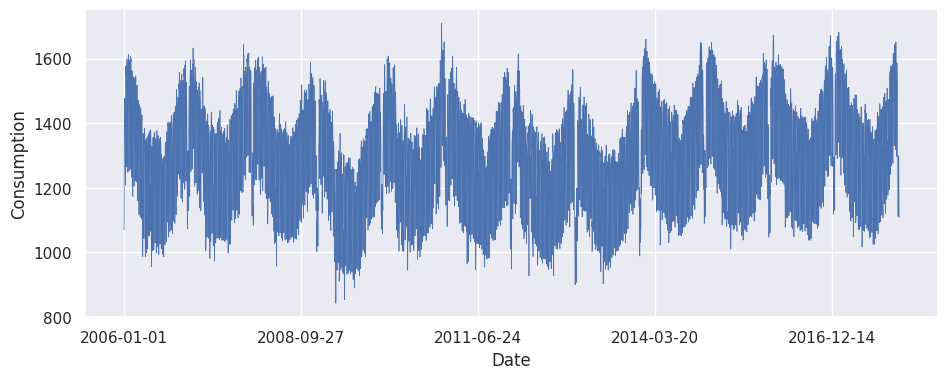

In [ ]:
sn.set(rc={'figure.figsize':(11, 4)})
col_to_plot = 'Consumption'
opsd_daily[col_to_plot].plot(linewidth=0.5)
plt.ylabel(col_to_plot)
plt.show()

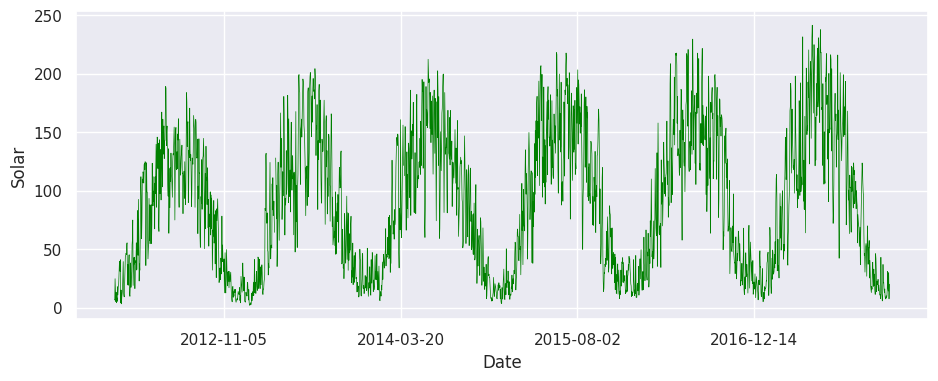

In [ ]:
sn.set(rc={'figure.figsize':(11, 4)})
col_to_plot = 'Solar'
opsd_daily[col_to_plot].plot(linewidth=0.5, color='green')
plt.ylabel(col_to_plot)
plt.show()

In [ ]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(
    marker='.',
    alpha=0.5,
    linestyle='None',
    figsize=(11, 9),
    subplots=True
)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

plt.show()

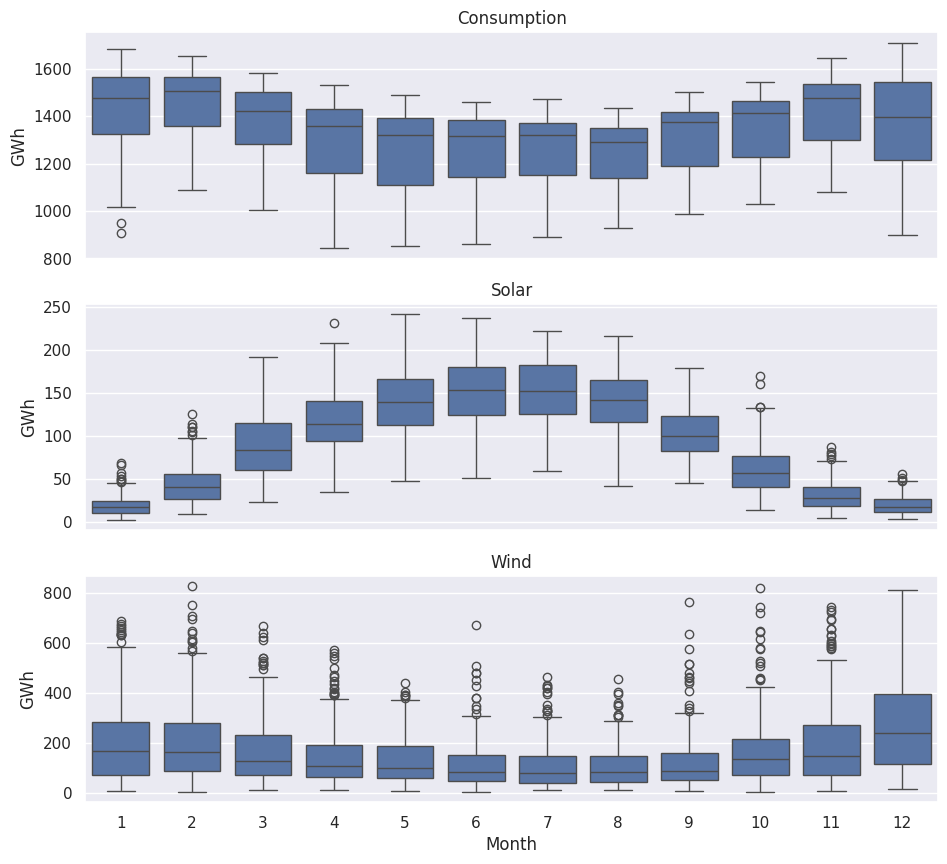

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sn.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

In [ ]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [ ]:
consum_freq = consum_sample.asfreq('D')
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


In [ ]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


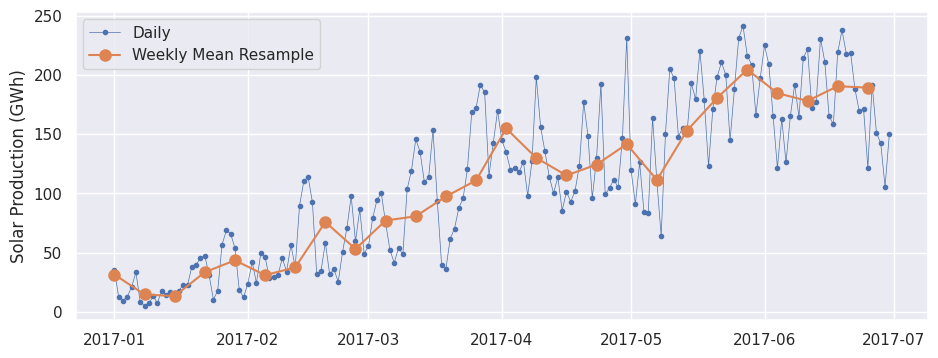

In [ ]:
start, end = '2017-01', '2017-06'
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

In [ ]:
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(8)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN


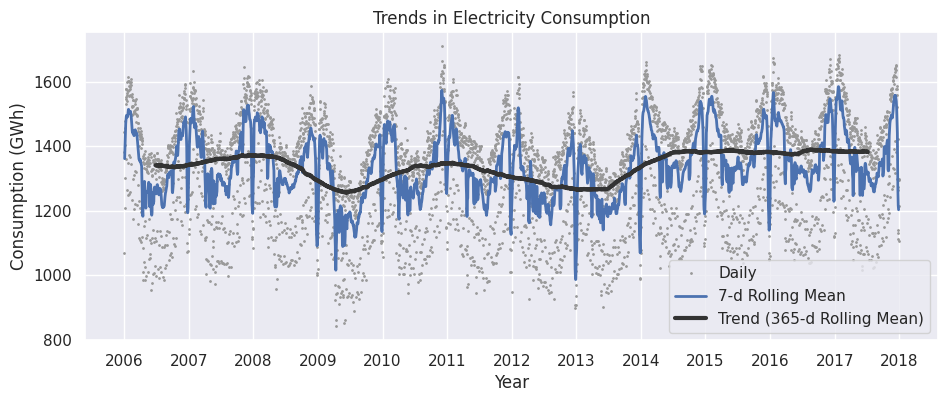

In [ ]:
import matplotlib.dates as mdates

opsd_365d = opsd_daily[data_columns].rolling(
    window=365,
    center=True,
    min_periods=360 ).mean()

fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
plt.show()

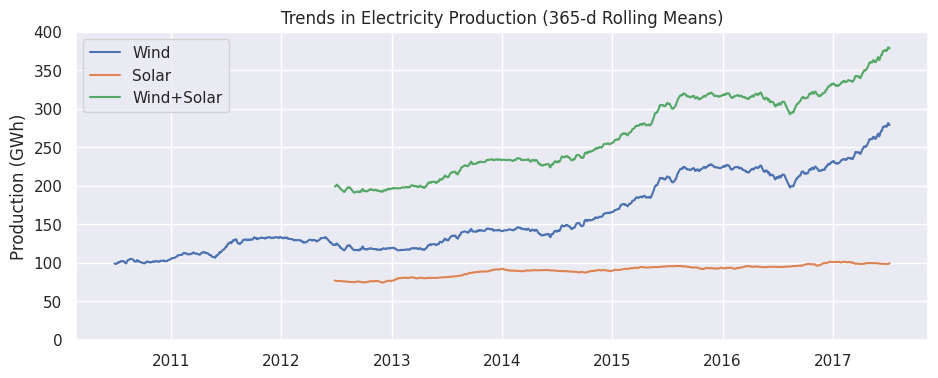

In [ ]:
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)')
plt.show()